## MAP Classification Lab

Let's take a look at the MAP Logistic Regression Model:

\begin{equation}
f(c|x,\omega) = \sigma(G(x,\omega))^c (1-\sigma(G(x,\omega))^{1-c} \, \pi(\omega) = \big(\frac{1}{2\pi}\big)^{N/2}e^{-\frac{\alpha}{2}||\omega||_2^2}
\end{equation}

For some function G which is linear function in $\{\omega_i\}$ and some Basis Functions $\{\phi_i\}$.
\begin{equation}
G(x,\omega) = \sum_i \omega_i \phi_i(x)
\end{equation}

This could be for example:

\begin{equation}
G(x,\omega) = \sum_i \omega_i \phi_i(x) = \omega_0 + \omega_1 x_1 + \omega_2 x_2^2 + \omega_3 e^{-x_1 - x_2^2}
\end{equation}

We can now compute the MAP approximation by minimizing the negative log posterior:
\begin{equation}
-log(\pi(\omega|\mathscr{D})) = -\sum_{c = 1} log(\sigma(G(x,\omega))) - \sum_{c = 0}log(1-\sigma(G(x,\omega)) + \frac{\alpha}{2}||\omega||_2^2
\end{equation}

First two logs are log prior, alpha/2 omega thing is our log likelihood.

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


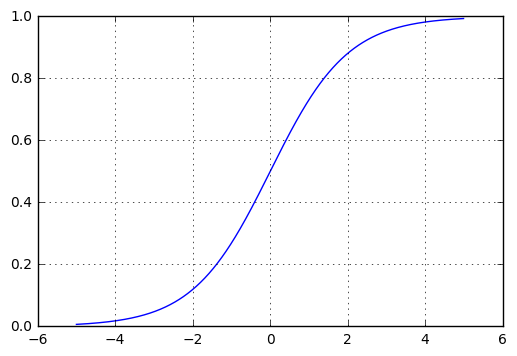

In [1]:
import numpy as np
sig = lambda x: 1./(1+np.exp(-x))
X = np.arange(-5,5,0.01)
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(X,sig(X))
plt.grid()

As we altready know $\sigma(0) = 0.5$ and $\sigma(t) > 0.5$ for $t > 0$. 

Substituting $G(x,\omega_{MAP})$ (and thus ignoring any uncertainty over the model parameters) for t in the above equation we can observe that the probability that a new point $x^{new}$ belogs to class 1 is 0.5 if $G(x^{new}, \omega_{MAP}) = 0$. Thus we can classify a new point $x^{new}$ as class 1 if 
\begin{equation}
G(x^{new}, \omega_{MAP}) > 0
\end{equation}

The surface of constant value $G(x,\omega_{MAP}) = 0$ determines the seperation between the two classes.

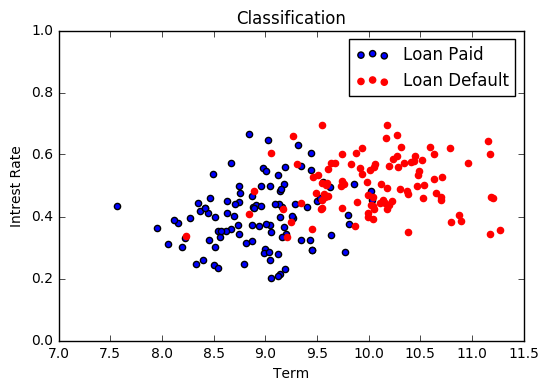

In [74]:
np.random.seed(42)
muA = np.array([0.4,9])
covA = np.array([[0.01,0],[0.01,0.3]])
muB = np.array([0.5,10])
covB = np.array([[0.01,0],[0.01,0.3]])
A = np.random.multivariate_normal(muA, covA, size =(100,))
B = np.random.multivariate_normal(muB, covB, size =(100,))
AX = [a[0] for a in A]
AY = [a[1] for a in A]
BX = [a[0] for a in B]
BY = [a[1] for a in B]
fig, ax = plt.subplots(1,1)
ax.scatter(AY,AX, label='Loan Paid')
ax.scatter(BY,BX, color ='red', label ='Loan Default')
ax.set_xlabel('Term')
ax.set_ylabel('Intrest Rate')
ax.set_title('Classification')
ax.set_ylim([0,1])
ax.legend()

**Exercise:**
1. Calculate the MAP solution for the simple linear model $G(x,\omega) = \omega_0 + \omega_1 t + \omega_2 i$
2. Plot the surface of constant value ($G(x,\omega_{MAP})= 0$)
2. Use Cross Validation together with the 0-1 loss (miss-classification loss) to determine the average loss of the model.
3. Write a function that classifies a new point $(t,i)$.
3. Choose a new logistic regression model by choosing a function G that is better suited for the data.(G has to be linear in the model parameters $\omega$. For example: $G(x,\omega) = \omega_0 + \omega_1 t^2 + \omega_2 i^2$
4. Plot the surface of constant value ($G(x,\omega_{MAP})= 0$)
5. Use Cross Validation together with the 0-1 loss (miss-classification loss) to determine the average loss of the new model.
6. Discuss which model is better suited for the situation.

In [75]:
import pandas as pd

In [76]:
data = []

for a in A:
    data.append([1, a[0],a[1]])
    
for b in B:
    data.append([0, b[0],b[1]])
    
data_df = pd.DataFrame(data, columns=['Outcome', 'term','interest'])

In [77]:
data_df.describe()

,Outcome,term,interest
count,200.000000,200.000000,200.000000
mean,0.500000,0.453988,9.503344
std,0.501255,0.110862,0.770386
min,0.000000,0.203086,7.562766
25%,0.000000,0.376296,8.951903
50%,0.500000,0.449161,9.457743
75%,1.000000,0.533115,10.057034
max,1.000000,0.894363,11.273664


In [78]:
max_val = max(data_df['term'])
min_val = min(data_df['term'])

def min_max(x):
    return (x-min_val)/(max_val-min_val)

data_df['term'] = data_df['term'].apply(min_max)

max_val = max(data_df['interest'])
min_val = min(data_df['interest'])

data_df['interest'] = data_df['interest'].apply(min_max)

In [79]:
data_df.describe()

,Outcome,term,interest
count,200.000000,200.000000,200.000000
mean,0.500000,0.362955,0.522940
std,0.501255,0.160373,0.207601
min,0.000000,0.000000,0.000000
25%,0.000000,0.250566,0.374340
50%,0.500000,0.355972,0.510652
75%,1.000000,0.477420,0.672147
max,1.000000,1.000000,1.000000


In [117]:
data1 = data_df.values.tolist()
data1

[[1.0, 0.2780009181266786, 0.46071898052177235],
 [1.0, 0.5221135279255993, 0.4815036727456087],
 [1.0, 0.2448244729251818, 0.35296029415121477],
 [1.0, 0.4375236066701177, 0.6196357709233059],
 [1.0, 0.35086725689999376, 0.3175390998066935],
 [1.0, 0.20529009995046227, 0.3193387606494621],
 [1.0, 0.014707906854966413, 0.4247233420596506],
 [1.0, 0.15798835767259992, 0.1332819821800707],
 [1.0, 0.303504544837837, 0.23756799487229294],
 [1.0, 0.056720866629391964, 0.2545843495743217],
 [1.0, 0.2909639722871142, 0.60377097183492],
 [1.0, 0.08070903382052598, 0.39854537706120197],
 [1.0, 0.2864987269296405, 0.3068736563726766],
 [1.0, 0.30873450536717206, 0.21712590414222452],
 [1.0, 0.22681792164112188, 0.29893443092557714],
 [1.0, 0.5366773699131396, 0.29685048548237003],
 [1.0, 0.13161849790660826, 0.38625970049545966],
 [1.0, 0.1301386428427535, 0.5097703838317469],
 [1.0, 0.0071278565858843195, 0.41988107265796065],
 [1.0, 0.2782018576871116, 0.19114054951453713],
 [1.0, 0.3291451875

In [148]:
atom_log = lambda w: lambda d: -np.log((1+np.exp(-(w[0] + w[1]*d[1] + w[2]*d[2])))) \
           if d[0] == 1. else np.log(1 - (1/(1+np.exp(-(w[0] + w[1]*d[1] + w[2]*d[2])))))
log_likelihood = lambda w: np.sum([atom_log(w)(d) for d in data])
log_prior = lambda w: -0.5 * np.sum(i**2 for i in w)
log_post = lambda w: log_likelihood(w) + log_prior(w)

We can now compute the MAP approximation by minimizing the negative log posterior:
\begin{equation}
-log(\pi(\omega|\mathscr{D})) = -\sum_{c = 1} log(\sigma(G(x,\omega))) - \sum_{c = 0}log(1-\sigma(G(x,\omega)) + \frac{\alpha}{2}||\omega||_2^2
\end{equation}


In [149]:
from scipy.optimize import minimize

In [150]:
RLS = lambda w: -log_post(w)
minRLS = minimize(lambda w: RLS(w),[0,0,0])


In [151]:
minRLS.x

array([ 4.42006106, -1.60179145, -0.39830152])

In [ ]:
NI = 

In [146]:
#un-normalize our data
for i in range(3):
    minRLS.x[i] = minRLS.x[i] * (max_val - min_val) + min_val
minRLS.x

array([ 23.96516077,   1.61868127,   6.08470945])

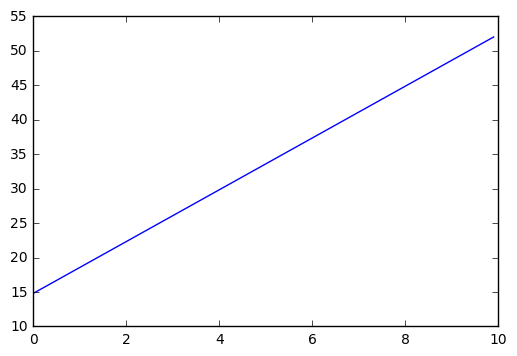

In [147]:
line_i = lambda t: (-minRLS.x[0] - minRLS.x[2]*t)/-minRLS.x[1]
T = np.arange(0,10,0.1)

plt.plot(T,line_i(T))